# 因子评测逻辑
-----

In [1]:
import sys, os
parent = 'Elaborated'
maindir = os.getcwd().split(parent)[:-1][0] + parent
sys.path.append(maindir)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
from datetime import datetime
from itertools import product
from IPython.display import clear_output

import factor_tester
import Factors_class
import signal_producer as sp
import utility as util

plt.interactive(True)

SyntaxError: invalid syntax (Factors_class.py, line 594)

## 因子特征处理
---
1. 数据清洗
2. 数据转化

### 数据探索

* 因子分布

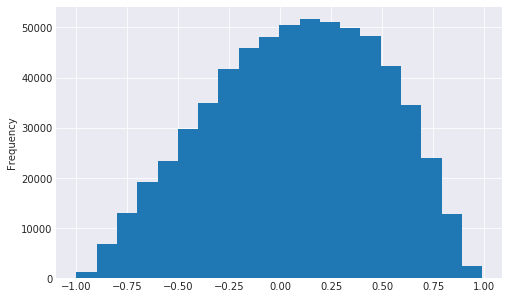

In [33]:
cmb_data_all['factor'].plot.hist(bins=20, grid=True, figsize=(8, 5))

### 数据预处理

In [7]:
cmb_data_all0 = cmb_data_all.copy()  # save as copy in case
cmb_data_all = cmb_data_all0.copy()  # restore copy in case

**数据转化 **
* 目前支持的功能: 加帽子, 标准化, 标准化且加帽子
* 未来会根据需求增加

*加帽子*
``` python
norm0 = signal_producer.add_cap(cmb_data_all,1,-1)
print 'norm0: \n', scs.describe(norm0)
_ = plt.hist(norm0, bins=20)
```

*标准化*
```python
norm1 = signal_producer.normalize(cmb_data_all, negative1_to_1 = True)
print 'norm1: \n', scs.describe(norm1)
_ = plt.hist(norm1, bins=20)
```

*标准化+加帽子*
```python
norm2 = signal_producer.normalize_with_cap(cmb_data_all, 1)
print 'norm2: \n', scs.describe(norm2)
_ = plt.hist(norm2)
```

## 因子评测
---

<br>
**标准输入范例：**
* input_data
    * 必须包含以下字段


| 字段属性 | 字段名 | 字段名类型 | 数据类型 |
| ---: | :--- | ---: | :---: | 
| 标的代码 | `code` | string | object |
| 时间索引 | `ts` | string | datetime64[ns] |
| 因子值 | `factor` | string | float64 |
| 预期周期收益 | `Xr` | int | float64 |
| 涨跌停状态 | `status` | string | int64 |



其中，$Xr$ 代表预期收益率的对应周期

* cmb_data_all是基于使用pycoraldb前提的中间过程变量。如果使用第三方数据来源，需要自己定义input_data，并使input_data的格式与以下一致。





In [36]:
# input_data = cmb_data_all.reset_index()
# input_data = cmb_data_all[cmb_data_all['count']>0].reset_index()
input_data = cmb_data_all.copy()

print 'Size of inputdata:\n\n'
print input_data.shape
print 'Types of data types:\n\n'
print input_data.dtypes
print 'Types of data column names:\n\n'
print input_data.dtypes
print 'Head of inputdata:\n\n'
print input_data.head()
print 'Tail of input_data:\n\n'
print input_data.tail()

Size of inputdata:

(631262, 7)
Data types:

code              object
ts        datetime64[ns]
factor           float64
30               float64
60               float64
300              float64
status             int64
dtype: object
Head of inputdata:

        code                  ts    factor        30        60       300  \
0  002385.SZ 2018-03-01 09:35:03 -0.161824  0.000797 -0.001594  0.001594   
1  002385.SZ 2018-03-01 09:35:06  0.042742  0.000000 -0.001594  0.001594   
2  002385.SZ 2018-03-01 09:35:09 -0.027882  0.000000 -0.001594  0.001594   
3  002385.SZ 2018-03-01 09:35:12  0.003260  0.000000 -0.001594  0.001594   
4  002385.SZ 2018-03-01 09:35:15 -0.032298  0.000000 -0.001594  0.001594   

   status  
0       0  
1       0  
2       0  
3       0  
4       0  
Tail of input_data:

           code                  ts    factor   30   60  300  status
4230  601216.SH 2018-04-27 14:54:45 -0.105378  0.0  0.0  NaN       0
4231  601216.SH 2018-04-27 14:54:48 -0.105378  0.0  0.0  N

**框架初始化**
* 输入标准输入
* 确定分段段数

In [9]:
t0 = datetime.now()
ft = factor_tester.factor_tester(input_data, split_num=10)
t1 = datetime.now()
print 'Now: ', t1
print 'Timed: ', t1 - t0

Now:  2018-05-18 19:14:28.661329
Timed:  0:02:30.127601


**因子分布**

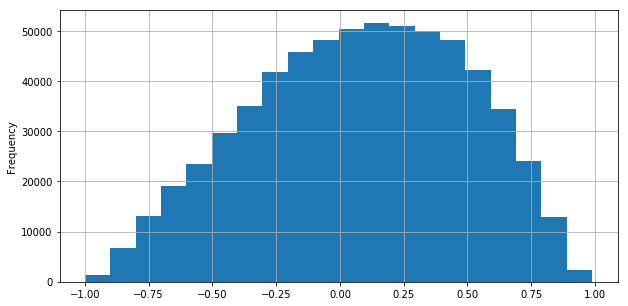

In [10]:
cmb_data_all['factor'].plot.hist(bins=20, grid=True, figsize=(10, 5))

**使用说明**
  - flag: 1为基于样本总体绝对大小分段， 2为基于样本个体分段后拼接合成；
  - 以下函数需在函数中指定周期长度；
      - plot_sectional_return
      - plot_return_dist
      - plot_trades_activity
      - plot_sectional_return_seperated
  - 以下函数需在函数中指定展示字段；
      - plot_res_within_group_seperated
  
      

### 评测结果

#### 1、组间表: 对比组间总体情况

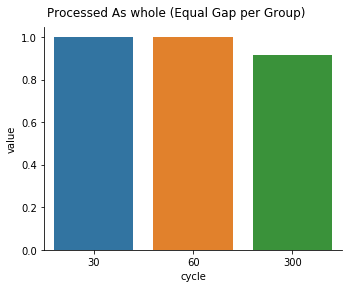

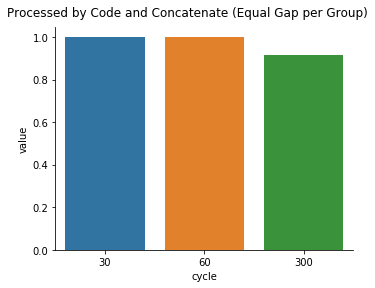

In [11]:
ft.plot_res_between_groups(flag=1, maxcol=1)  
ft.plot_res_between_groups(flag=2, maxcol=1)

**说明：该图反应在测试期间内的整体表现**
1. IC值较低，收益能力较差
2. 因子值较稳定
3. Granger统计值较高说明互为因果的情形较显著

#### 2、组内表：对比组内分段结果

说明：
1. avgrtn表示各段平均收益率；
2. count表示各组中包含原始数据的个数；
3. ic表示各组中原始数据的整体IC值；
4. std表示各组中收益率的标准差（稳定情况）；

Now:  2018-05-18 19:14:29.162434
Timed:  0:00:01.484686


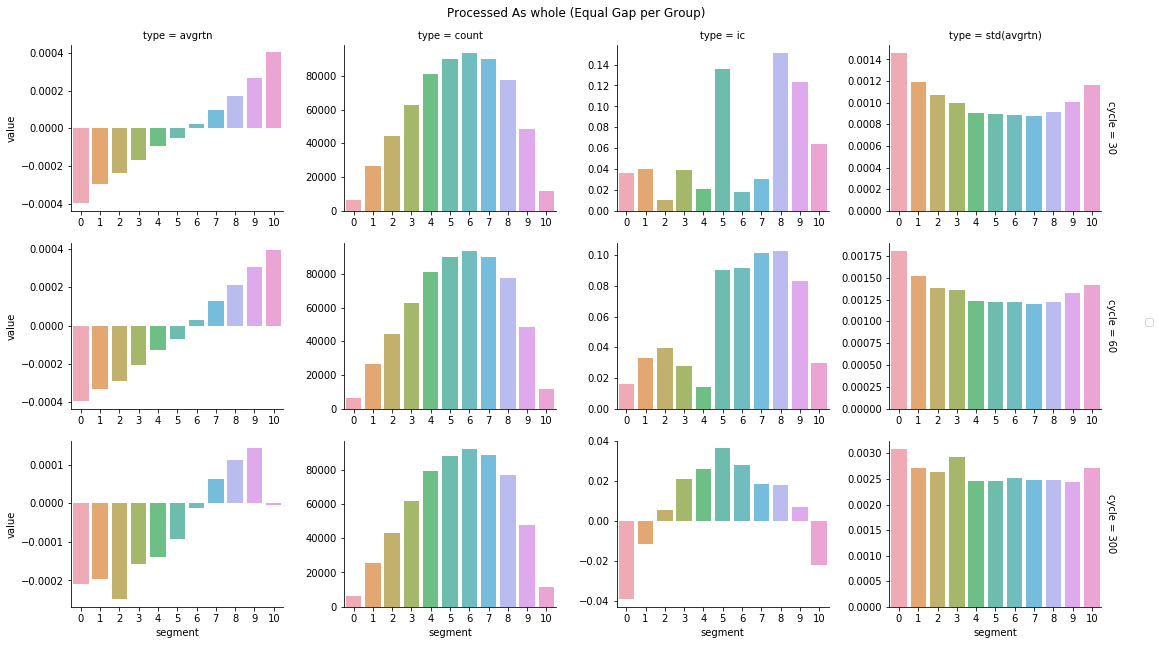

In [12]:
t0 = datetime.now()
print 'Now: ', t0
g2a = ft.plot_res_within_group(flag=1)
t1 = datetime.now()
print 'Timed: ', t1 - t0

Now:  2018-05-18 19:14:31.604349
Timed:  0:00:01.669951


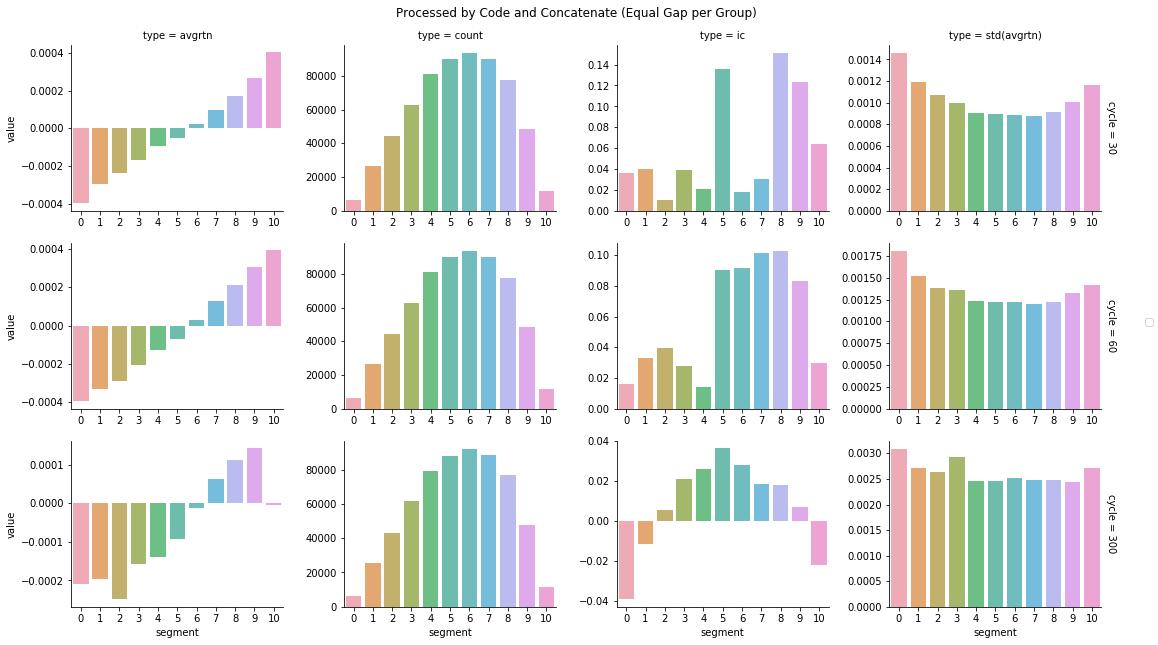

In [13]:
t0 = datetime.now()
print 'Now: ', t0
g2b = ft.plot_res_within_group(flag=2)
t1 = datetime.now()
print 'Timed: ', t1 - t0

**说明：该图反应在测试期间内的分段表现**
- avgrtn和ic或pearsonr的差异比较大
  - 说明样本内亏损或盈利的情况较多，但因子的有效性能仍能被IC或pearsonr值解释，两者没有关系。
  - 比如说左起第一段（深蓝色），avgrtn低说明亏损样本在该段内占比较大，绝对值高的正ic说明该段内因子和未来收益正相关且解释程度强。而右起第一段（蓝绿色），avgrtn高说明盈利样本在该段内占比较大，绝对值低的负ic说明该段内因子和未来收益负相关且解释程度弱。
- ic和pearsonr
  - ic相对pearsonr更加严格
- 整体分段和个体分段合并的std相比
  - 后者std在各段当中比较一致的原因是后者分段方式使得每段的样本个数都比较多，所以比较稳定。
- Granger统计值
  - 目前只对单只标的有效，表示因子导致未来收益的因果关系（滞后相关性）。

#### 3、分组历史每日累计收益

Now:  2018-05-18 19:14:34.234328
Timed:  0:00:03.276866


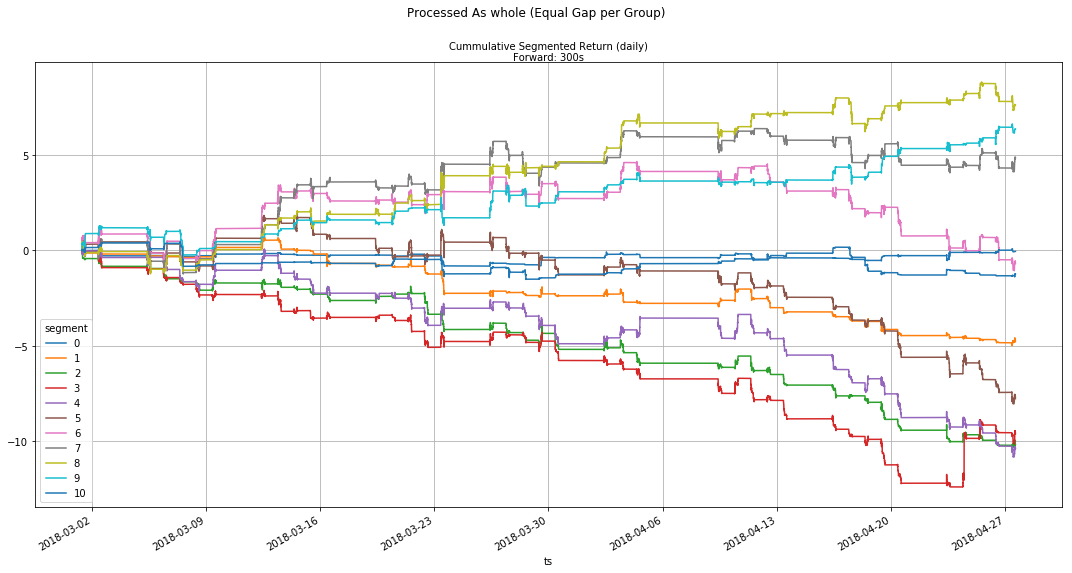

In [14]:
t0 = datetime.now()
print 'Now: ', t0
fig3a, ax3a = ft.plot_sectional_return(300, flag=1, tfreq='1d', tformat='%y%m%d', figsize=(15, 7))
t1 = datetime.now()
print 'Timed: ', t1 - t0

Now:  2018-05-18 19:14:42.946331
Timed:  0:00:02.647939


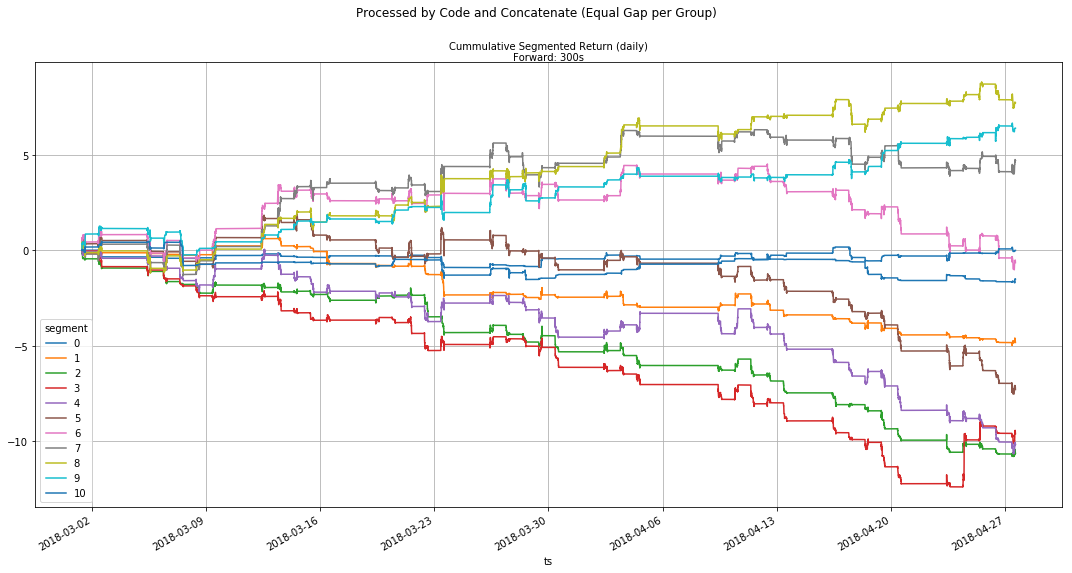

In [15]:
t0 = datetime.now()
print 'Now: ', t0
fig3b, ax3b = ft.plot_sectional_return(300, flag=2, tfreq='1d', tformat='%y%m%d', figsize=(15, 7))
t1 = datetime.now()
print 'Timed: ', t1 - t0

**说明**
- 按分段顺序递增且分散度越高表示因子显著性越强
- 该图与组内表（分段直方统计图）中的avgrtn，ic，pearsonr没有直接联系
  - 从该图可以观察出高频因子是否长周期稳定有效，而组内表则看出高频因子整体有效情况。
  - 该图是每日平均后，再基于每日平均收益进行累加；而组内表则是直接总体平均。
  $ \frac{r_1 + r_2 + ... + r_n}{d_1 + d_2 + ... + d_n} \neq \frac{r_1}{d_1} + \frac{r_2}{d_2} + ... + \frac{r_3}{d_3} $

#### 4、分组历史收益分布

**说明**
- 图注：
    - 填充的方形的横线，从上至下分别表示75%,50%,25%分位点，其中50%的分位点可能与75%或25%的先重合
    - 三角形表示样本均值
    - 填充的方形以外的横线，表示样本均值上下浮动3个标准差的值
- 该图忽略了异常值，异常值为两段横线以外的值。横线分别为10%和90%的分位点。
- 该图可以看作是组内表中avgrtn的延展，除了表示了平均值，还表示了分位点(25%, 50%, 75%）和置信区间（n个标准差）

Now:  2018-05-18 19:14:50.535440
Timed:  0:00:00.448605


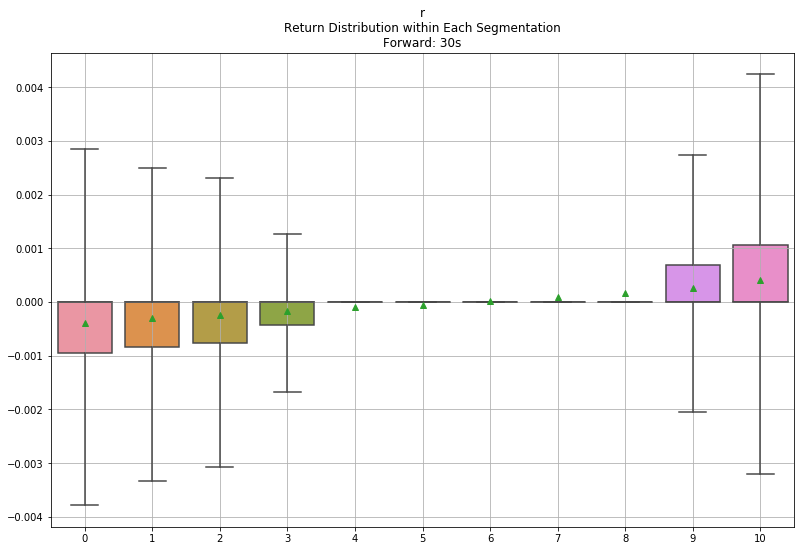

In [16]:
t0 = datetime.now()
print 'Now: ', t0
fig4a, ax4a = ft.plot_return_dist(30, flag=1, kind='box')
t1 = datetime.now()
print 'Timed: ', t1 - t0

Now:  2018-05-18 19:14:51.164891
Timed:  0:00:00.191919


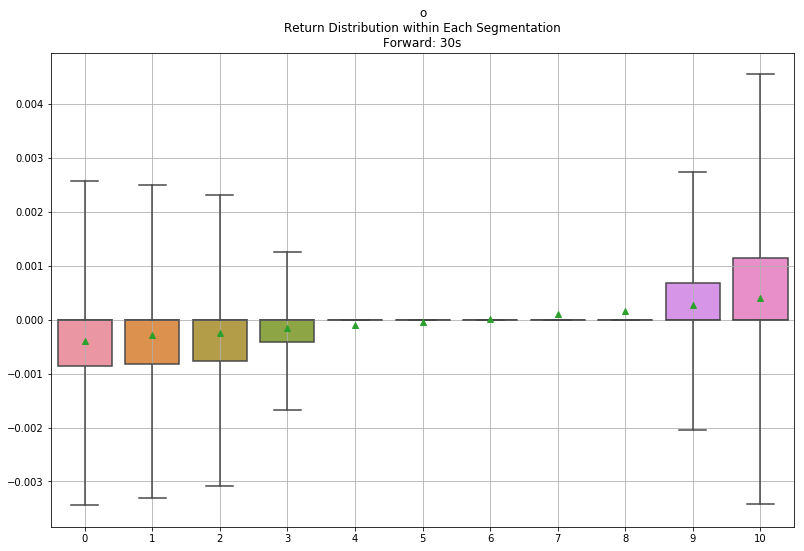

In [17]:
t0 = datetime.now()
print 'Now: ', t0
fig4b, ax4b = ft.plot_return_dist(30, flag=2, kind='box')
t1 = datetime.now()
print 'Timed: ', t1 - t0

#### 5、每日交易活跃程度

**说明**
1. 纵坐标为每天的有效样本个数，颜色代表数量程度。
2. 

Now:  2018-05-18 19:14:51.356810
Timed:  0:00:02.091775


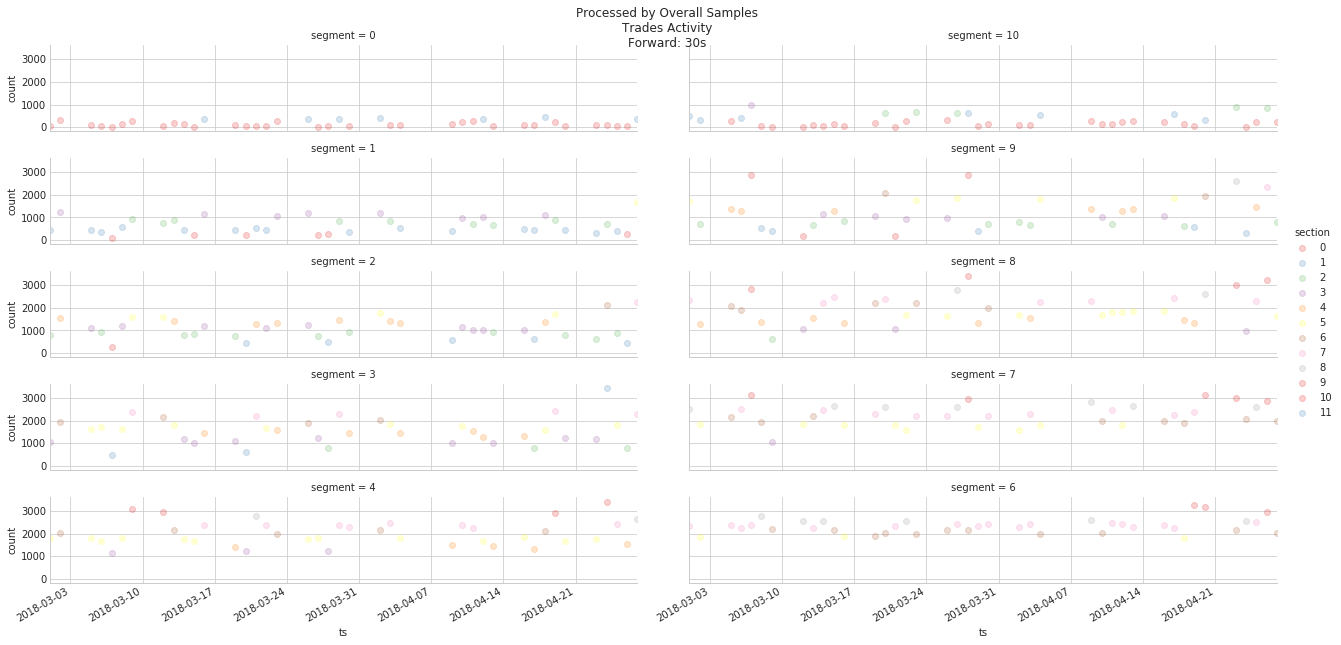

In [18]:
t0 = datetime.now()
print 'Now: ', t1
g5a = ft.plot_trades_activity(30, flag=1)
t1 = datetime.now()
print 'Timed: ', t1 - t0

Now:  2018-05-18 19:14:54.239605
Timed:  0:00:02.229743


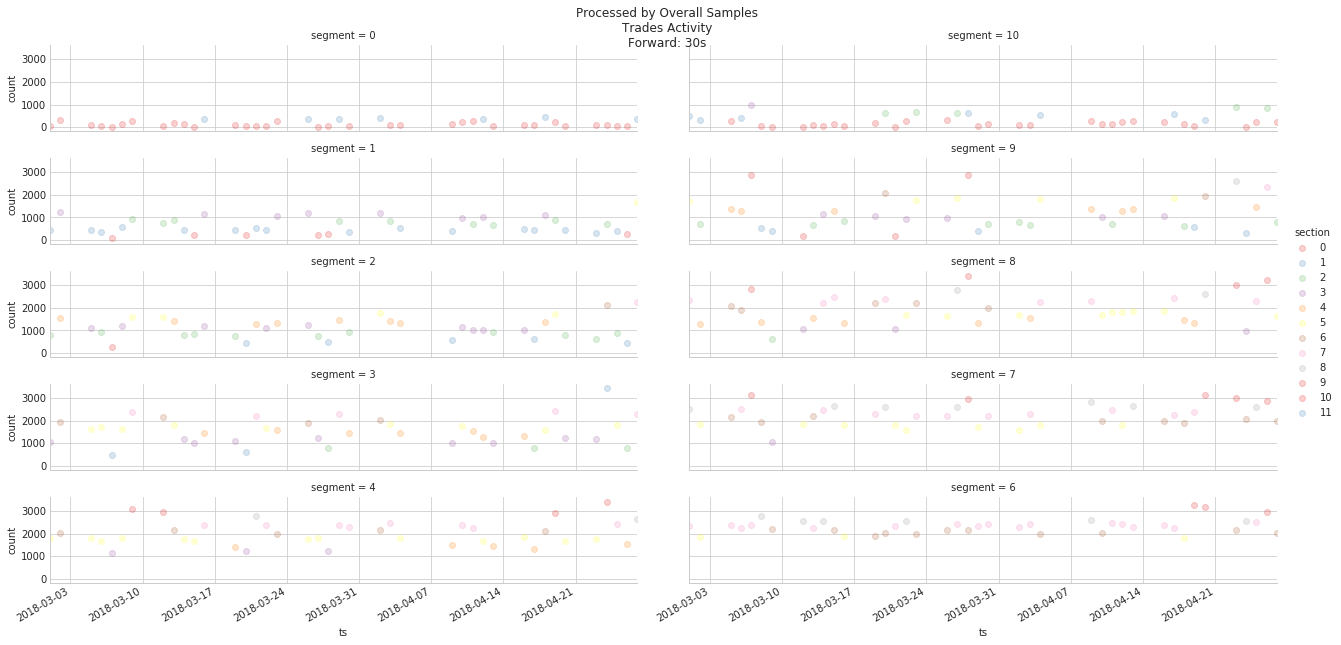

In [19]:
t0 = datetime.now()
print 'Now: ', t0
g5a = ft.plot_trades_activity(30, flag=1)
t1 = datetime.now()
print 'Timed: ', t1 - t0

如果观察到交易次数异常多的点，可以通过一下方式把具体日期找出来。可定义异常程度，默认sigma=3。
```python
abn_dates = ft.get_abnormal_dates(sigma=3)  # ft.plot_trades_activity must be run before.
t11 = time.clock()
print abn_dates
```

#### 6、基于用户定义的样本组合的因子表现（可选）
- 这一部分属于细分评测，根据用户需求视情况而定。
- 在以下但不限于情况，可能需要运行这一部分进一步评测。
    - 该因子并不是全市场或全品种有效的，需要进一步研究因子适用对象。
    - 该因子只在满足一定条件下的标的有效，如成交量大的，主力多的或股东持仓期长的。
- 使用条件：需要有明确的逻辑对样本进行分组。
- 为了展示，Demo里使用的是随机抽样分组。

##### 6.1 用户自定义分组

###### 6.1.1 根据行业分组

###### 6.1.2 根据市值大小排序分组

###### 6.1.3 随机分组

###### 6.1.4 自定义组别

In [20]:
n = 5 # number of groups
group_map = {co: i for i in range(len(ft.codes)/n) for co in ft.codes[i*n:(i+1)*n]}
rest_codes = {co: max(group_map.values())+1 for co in ft.codes[~np.isin(ft.codes, group_map.keys())]}
group_map.update(rest_codes)

In [21]:
t0 = datetime.now()
print 'Now: ', t0
ft.plot_seperated(regroup=group_map)
t1 = datetime.now()
print 'Timed: ', t1 - t0
print 'Group status: \n', ft.input_df2[['code', 'user_grp']].drop_duplicates().groupby('user_grp').count()

Now:  2018-05-18 19:14:57.114185
Timed:  0:00:01.792636
Group status: 
          code
user_grp      
0            5


Now:  2018-05-18 19:14:58.950742
Timed:  0:00:01.357034


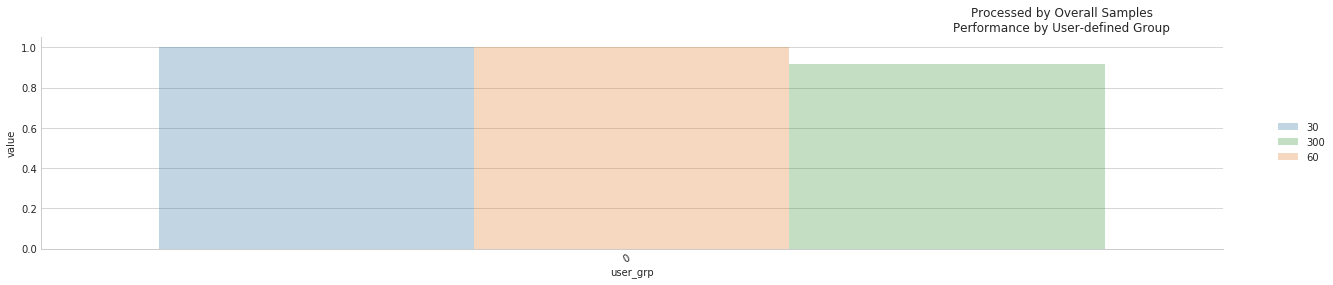

In [22]:
t0 = datetime.now()
print 'Now: ', t0
g61a = ft.plot_res_between_groups_seperated(flag=1)
t1 = datetime.now()
print 'Timed: ', t1 - t0

Now:  2018-05-18 19:15:00.436162
Timed:  0:00:01.166989


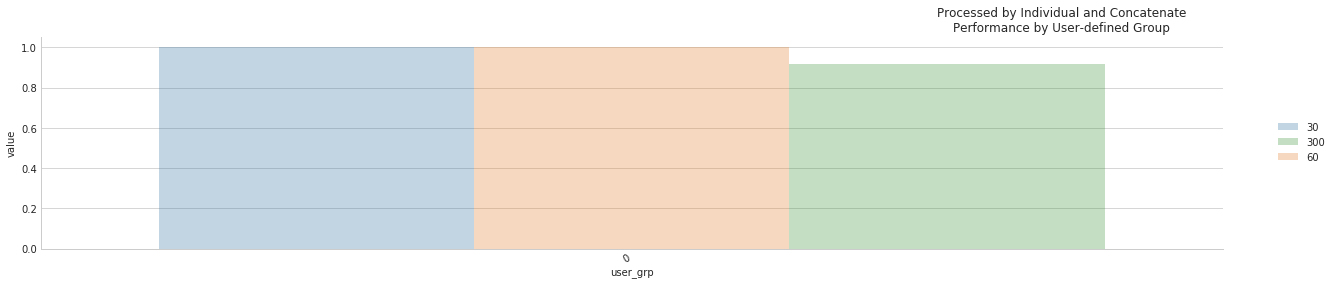

In [23]:
t0 = datetime.now()
print 'Now: ', t0
g61b = ft.plot_res_between_groups_seperated(flag=2)
t1 = datetime.now()
print 'Timed: ', t1 - t0

In [24]:
###### 6.2.2 因子分段的直方统计图

Now:  2018-05-18 19:15:01.741293
Timed:  0:01:14.534140


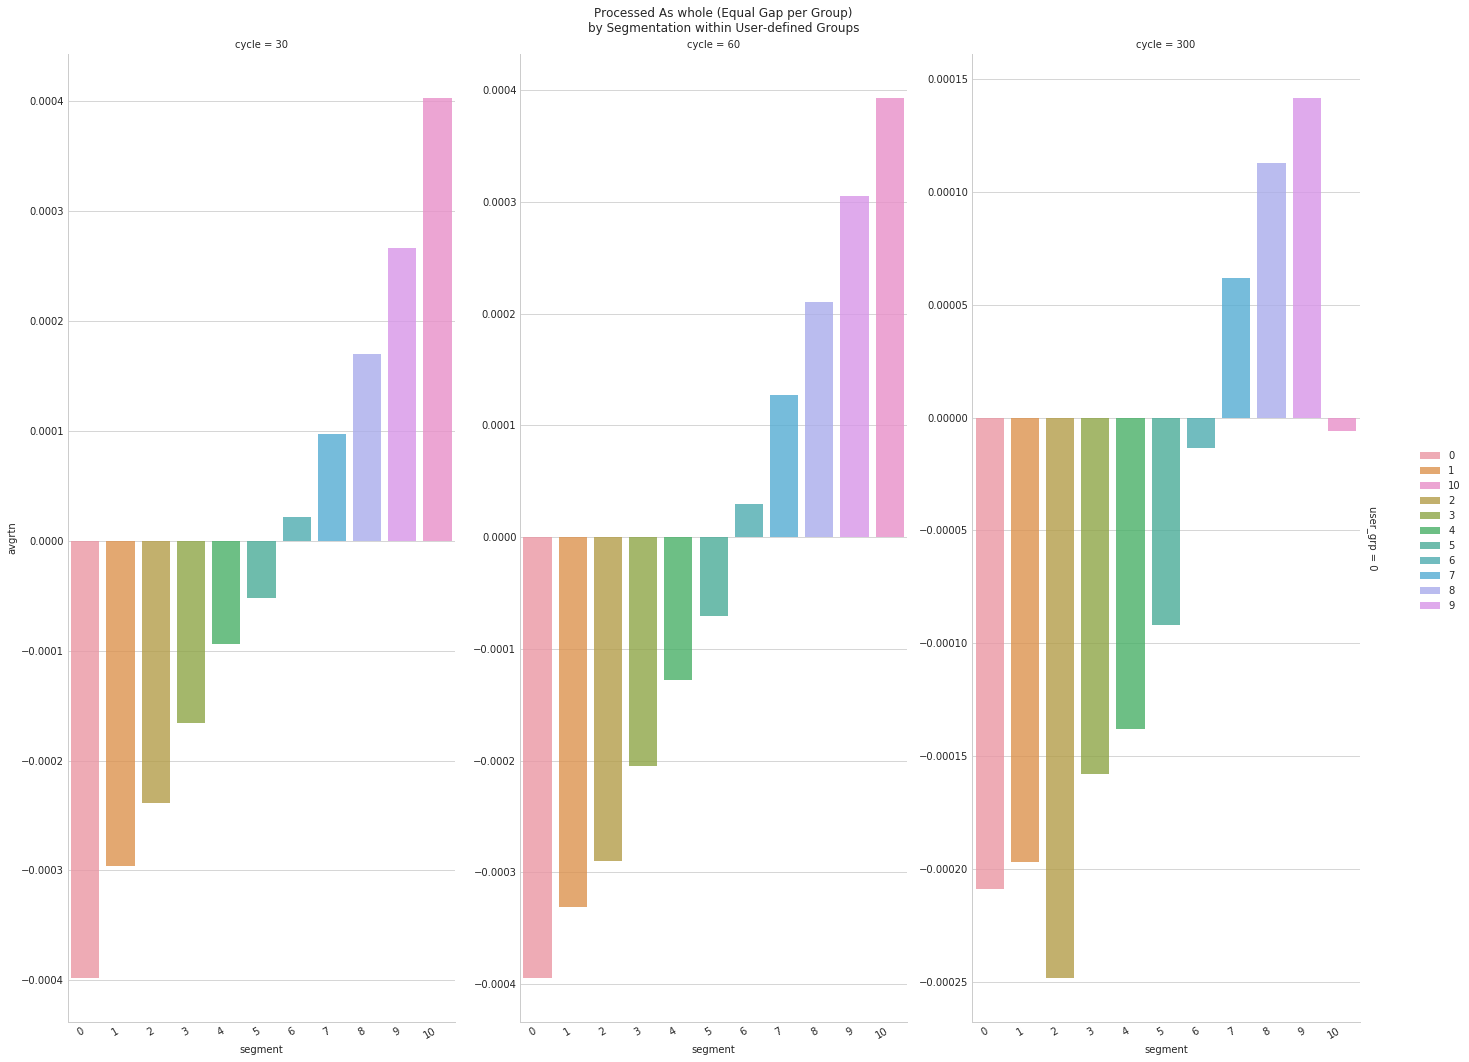

In [25]:
t0 = datetime.now()
print 'Now: ', t0
g62a = ft.plot_res_within_group_seperated(flag=1, res_type='avgrtn')
t1 = datetime.now()
print 'Timed: ', t1 - t0

Now:  2018-05-18 19:16:17.258712
Timed:  0:01:14.769409


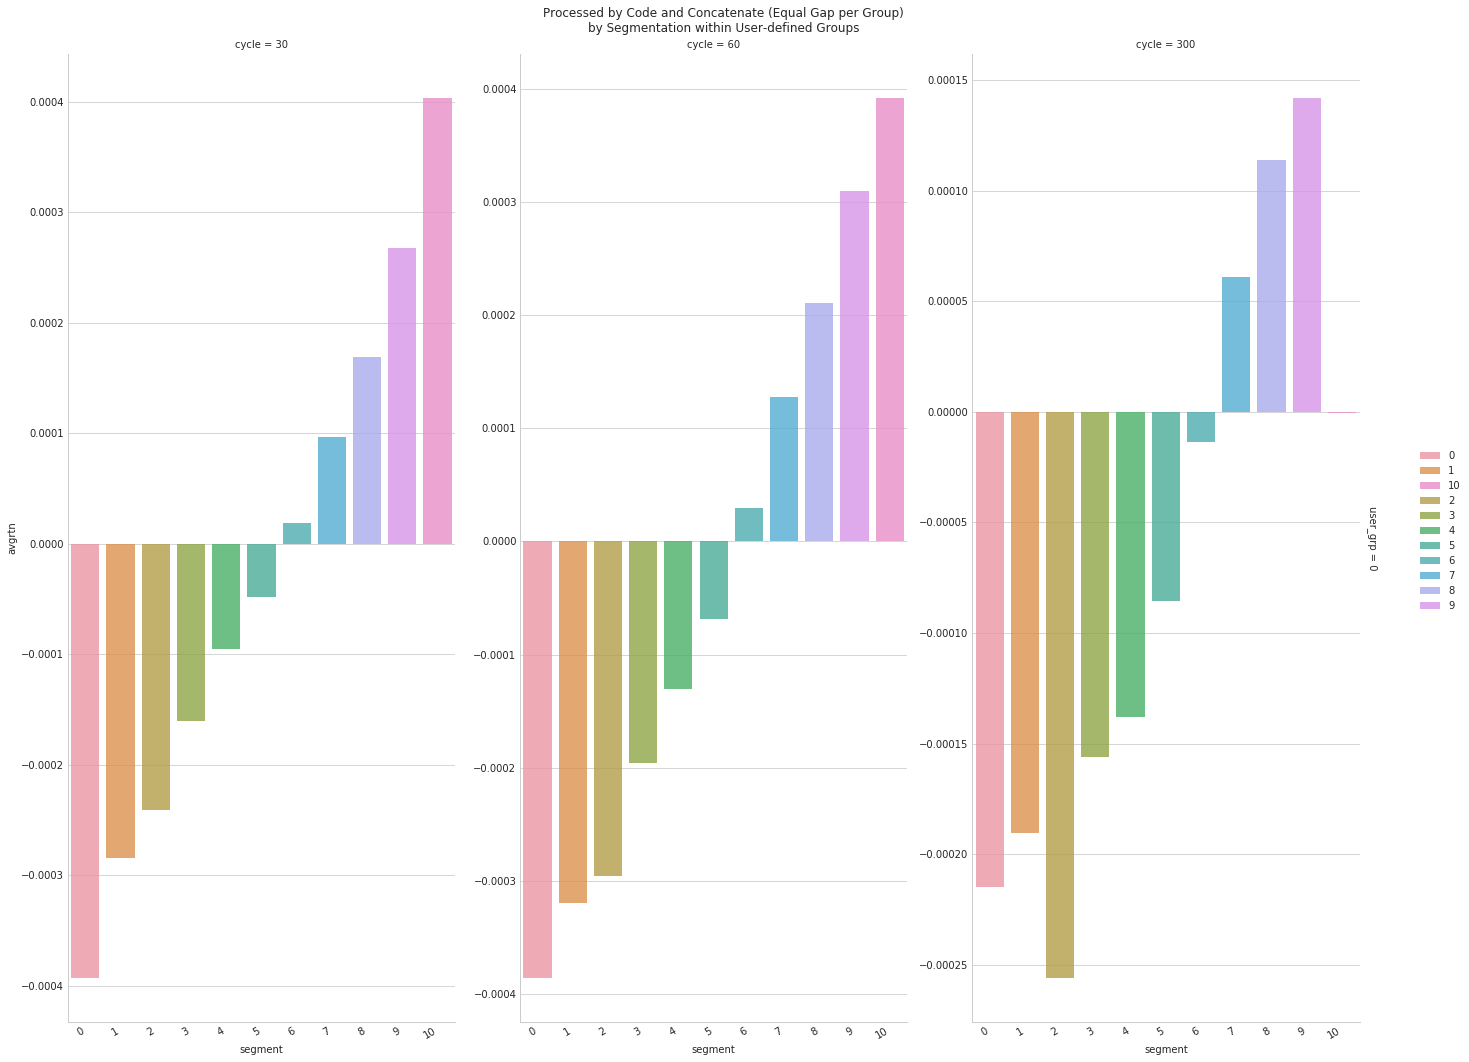

In [26]:
t0 = datetime.now()
print 'Now: ', t0
g62b = ft.plot_res_within_group_seperated(flag=2, res_type='avgrtn')
t1 = datetime.now()
print 'Timed: ', t1 - t0

In [27]:
###### 6.2.3 因子分段的累积收益表现

Now:  2018-05-18 19:17:33.126850
Timed:  0:00:31.913196


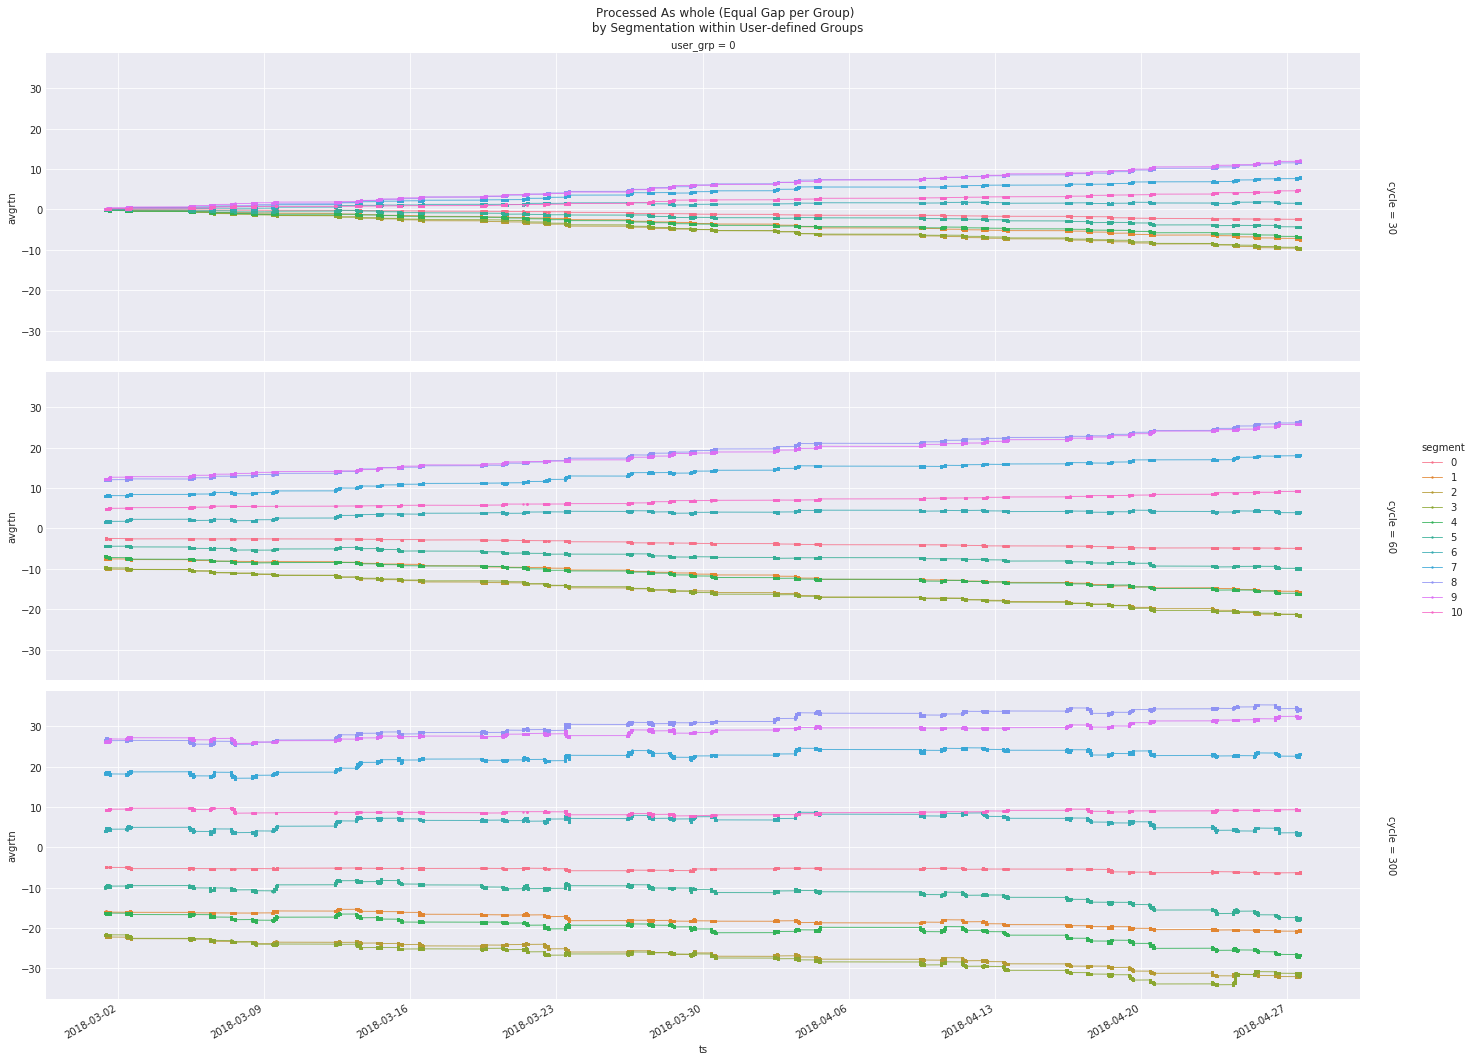

In [28]:
t0 = datetime.now()
print 'Now: ', t0
g63a = ft.plot_sectional_return_seperated(flag=1)
t1 = datetime.now()
print 'Timed: ', t1 - t0

Now:  2018-05-18 19:18:08.550066
Timed:  0:00:30.447590


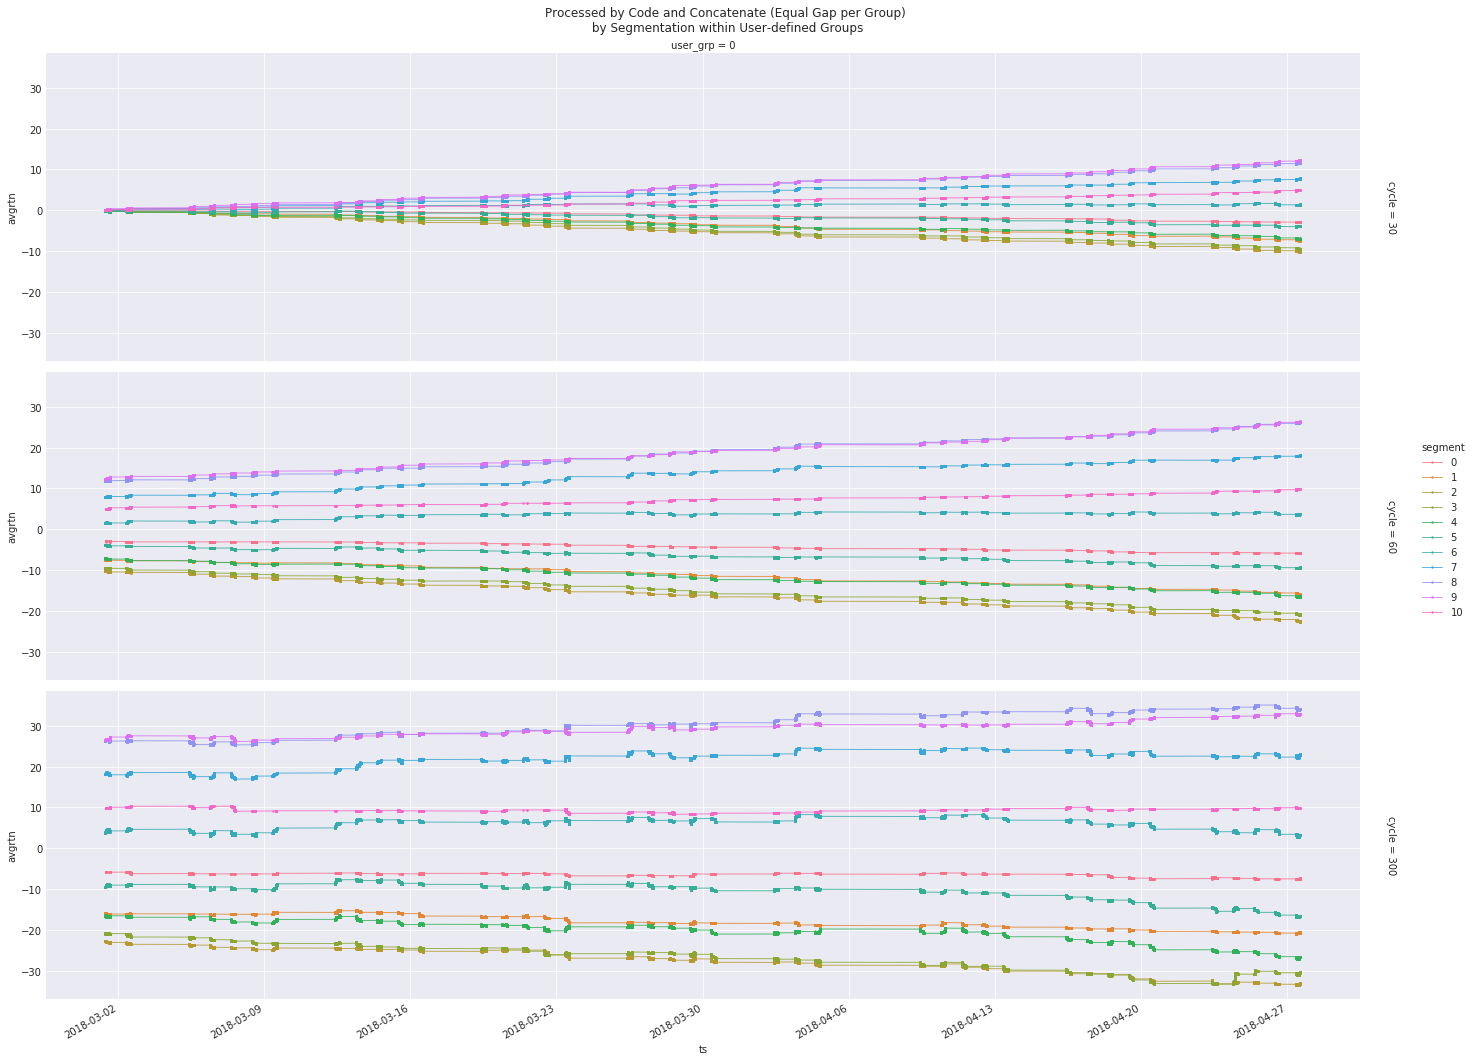

In [29]:
t0 = datetime.now()
print 'Now: ', t0
g63b = ft.plot_sectional_return_seperated(flag=2)
t1 = datetime.now()
print 'Timed: ', t1 - t0

In [30]:
print 'Completed'

Completed


In [31]:
## Overall Results

In [32]:
## Inspection